<a href="https://colab.research.google.com/github/awaludiens/uas_mp_awaludiens.ipynb/blob/main/uas_mp_awaludiens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

%matplotlib inline

In [2]:
plt.style.use('bmh')

In [ ]:
# Memuat data
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

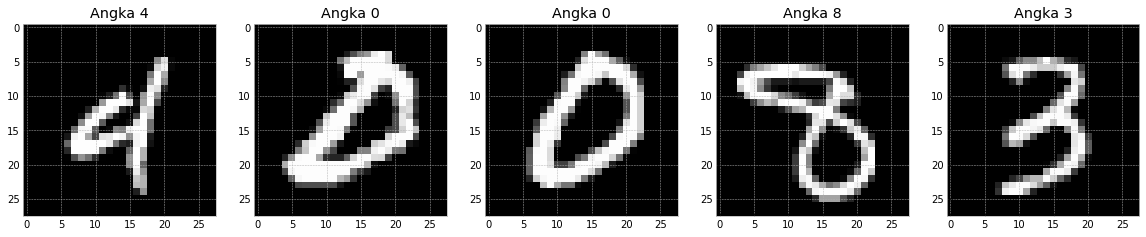

In [5]:
np.random.seed(42)

fig, axes = plt.subplots(figsize=(20,4), ncols=5)
ix = np.random.randint(X_train.shape[0], size=5)
for im, y, ax in zip(X_train[ix], Y_train[ix], axes.flatten()):
    ax.set_title('Angka {}'.format(y))
    ax.imshow(im, cmap='gist_gray')
plt.show()

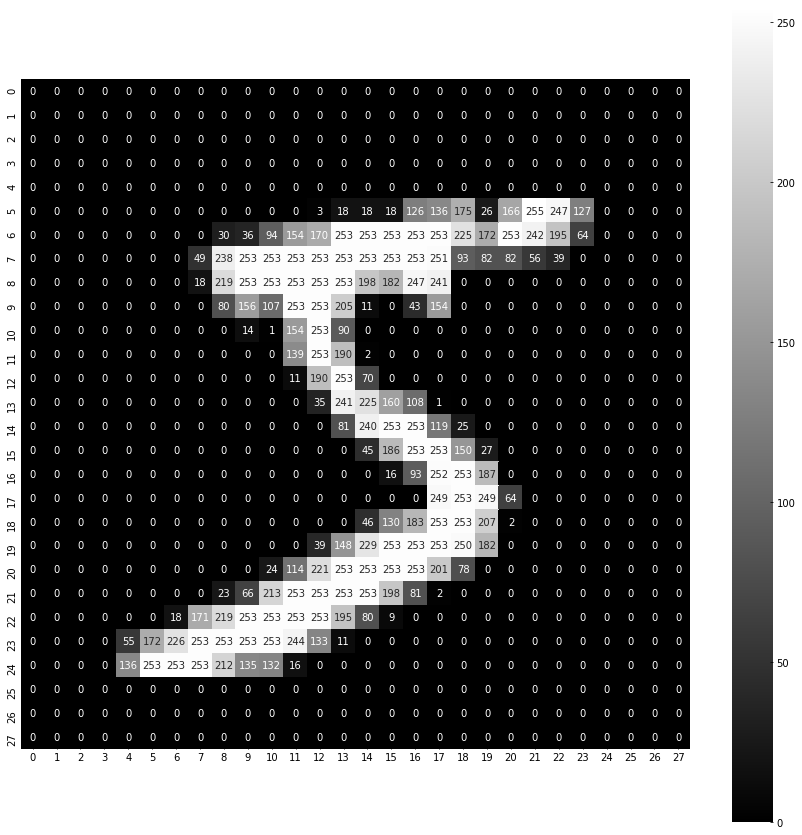

In [6]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(
    X_train[0], # mengambil data pertama (indeks ke-0) saja
    annot=True, # anotasi heatmap-nya, i.e. tuliskan angka di tiap kotak
    fmt='d', # angka ditulis dalam bentuk integer
    cmap='gist_gray', # ganti warnanya menjadi abu-abu
    square=True, # bentuk gambarnya agar menjadi persegi
    ax=ax
);

In [7]:
def net1(num_classes):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(512, activation='sigmoid', input_shape=(784,)))
    model.add(tf.keras.layers.Dense(256, activation='sigmoid'))
    model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
    return model

In [8]:
num_classes = 10

model = net1(num_classes)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [9]:
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = tf.keras.utils.to_categorical(Y_train, num_classes)
y_test = tf.keras.utils.to_categorical(Y_test, num_classes)

In [10]:
Y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
pd.DataFrame(y_train[:5], columns=range(10))

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [12]:
np.random.seed(42)

batch_size = 128
num_classes = 10
epochs = 20

model = net1(num_classes)
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(lr=0.01), # Stochastic Gradient Descent dengan lr (learning rate) = η
    metrics=['accuracy']
)

In [13]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, # mencetak proses pelatihan
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {:.4f}'.format(score[0]))
print('Test accuracy: {:.2%}'.format(score[1]))

Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 2.3006 - accuracy: 0.1382 - val_loss: 2.2268 - val_accuracy: 0.2714
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 2.2068 - accuracy: 0.3607 - val_loss: 2.1295 - val_accuracy: 0.4613
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 2.1009 - accuracy: 0.5269 - val_loss: 1.9904 - val_accuracy: 0.6263
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 1.9482 - accuracy: 0.6158 - val_loss: 1.7883 - val_accuracy: 0.6379
Epoch 5/20
469/469 [==============================] - 4s 9ms/step - loss: 1.7375 - accuracy: 0.6701 - val_loss: 1.5439 - val_accuracy: 0.7090
Epoch 6/20
469/469 [==============================] - 4s 9ms/step - loss: 1.4979 - accuracy: 0.7047 - val_loss: 1.3084 - val_accuracy: 0.7419
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 1.2703 - accuracy: 0.7471 - val_loss: 1.1170 - val_accuracy: 0.7617
Epoch